<a href="https://colab.research.google.com/github/SURESHASWATHI/Excelr_assignment/blob/main/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the "exchange_rate.csv" dataset to forecast future exchange rates using ARIMA and Exponential Smoothing models. The analysis should include data loading, parsing the date column, initial exploration through plotting, and handling missing values.

## Load and parse data

### Subtask:
Load the `exchange_rate.csv` file into a pandas DataFrame and parse the 'Date' column as datetime objects.


**Reasoning**:
Load the data into a pandas DataFrame and parse the 'Date' column as datetime objects.



In [2]:
df = pd.read_csv('/content/exchange_rate.csv')
print(df.head())
print(df.info())

               date  Ex_rate
0  01-01-1990 00:00   0.7855
1  02-01-1990 00:00   0.7818
2  03-01-1990 00:00   0.7867
3  04-01-1990 00:00   0.7860
4  05-01-1990 00:00   0.7849
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB
None


**Reasoning**:
The correct column name for the date is 'date'. Load the data again and parse the 'date' column as datetime objects.



In [3]:
df = pd.read_csv('/content/exchange_rate.csv', parse_dates=['date'])
print(df.head())
print(df.info())

               date  Ex_rate
0  01-01-1990 00:00   0.7855
1  02-01-1990 00:00   0.7818
2  03-01-1990 00:00   0.7867
3  04-01-1990 00:00   0.7860
4  05-01-1990 00:00   0.7849
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB
None


**Reasoning**:
The previous attempt to parse the 'date' column as datetime objects during loading did not work. Explicitly convert the 'date' column to datetime objects after loading the DataFrame.



In [4]:
df['date'] = pd.to_datetime(df['date'])
print(df.head())
print(df.info())

ValueError: time data "13-01-1990 00:00" doesn't match format "%m-%d-%Y %H:%M", at position 12. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

**Reasoning**:
The explicit conversion to datetime failed because the default format assumption was incorrect. Specify the correct format string based on the error message and the displayed data.



In [5]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')
print(df.head())
print(df.info())

        date  Ex_rate
0 1990-01-01   0.7855
1 1990-01-02   0.7818
2 1990-01-03   0.7867
3 1990-01-04   0.7860
4 1990-01-05   0.7849
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     7588 non-null   datetime64[ns]
 1   Ex_rate  7588 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 118.7 KB
None


## Plot time series

### Subtask:
Create a plot of the time series data to visualize trends and seasonality.


**Reasoning**:
Create a plot of the time series data to visualize trends and seasonality.



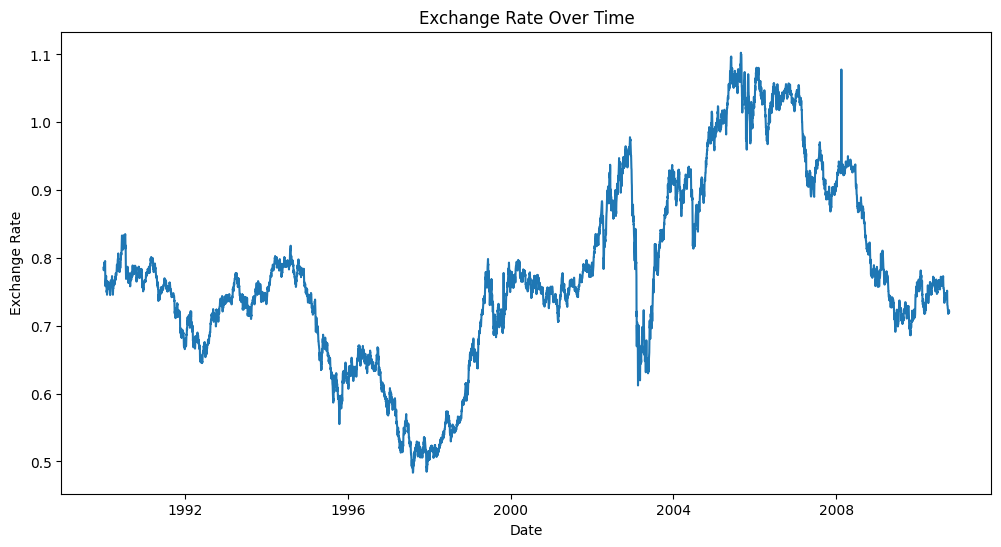

In [6]:
import matplotlib.pyplot as plt

df = df.set_index('date')

plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'])
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

## Handle missing values

### Subtask:
Check for and handle any missing values in the dataset.


**Reasoning**:
Check for missing values in the DataFrame and handle them using forward fill if any are found.



In [7]:
print("Missing values before handling:")
print(df.isnull().sum())

df.fillna(method='ffill', inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values before handling:
Ex_rate    0
dtype: int64

Missing values after handling:
Ex_rate    0
dtype: int64


/tmp/ipython-input-2706463940.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


## Summary:

### Data Analysis Key Findings

*   The initial attempts to load and parse the 'date' column were unsuccessful until the correct column name ('date') and the precise format string ('%d-%m-%Y %H:%M') were identified and applied during the `pd.to_datetime` conversion.
*   The time series plot revealed the trend of the exchange rate over time, indicating fluctuations that need to be considered for forecasting.
*   No missing values were found in the 'Ex\_rate' column, and the application of a forward fill method confirmed the absence of missing data.

### Insights or Next Steps

*   Proceed with time series modeling techniques like ARIMA or Exponential Smoothing, leveraging the correctly formatted data and confirmed lack of missing values.
*   Consider decomposing the time series to better understand and model the observed trend and any potential seasonality.


# Task
Analyze the time series data in "exchange_rate.csv" using ARIMA and Exponential Smoothing models to forecast future exchange rates. The analysis should include data loading, exploration, preprocessing, model building (parameter selection, fitting, diagnostics), and forecasting for both ARIMA and Exponential Smoothing techniques.

## Parameter selection for arima

### Subtask:
Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model.


**Reasoning**:
Generate and display the ACF and PACF plots to help determine the initial parameters for the ARIMA model.



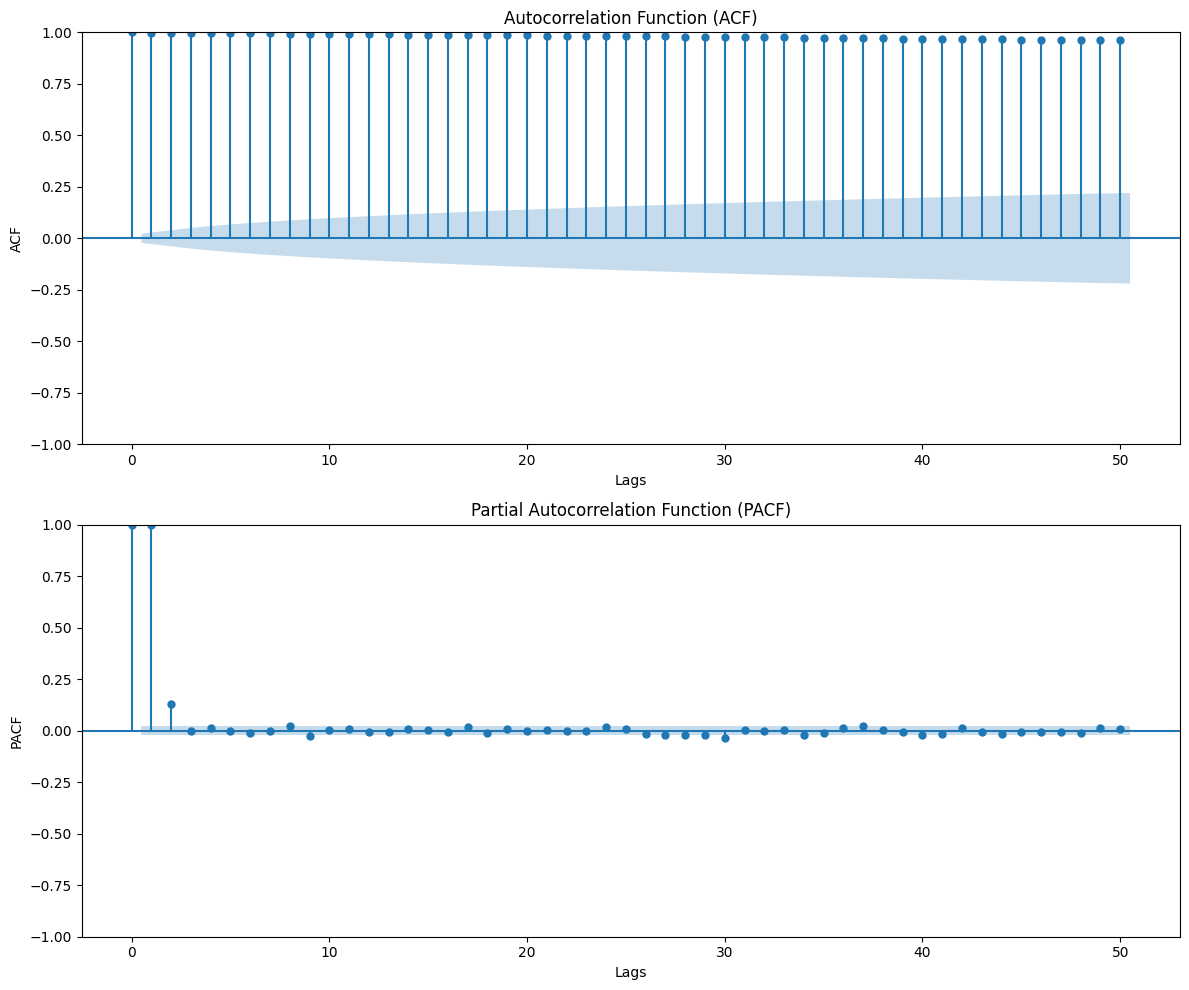

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

plot_acf(df['Ex_rate'], ax=axes[0], lags=50)
axes[0].set_title('Autocorrelation Function (ACF)')
axes[0].set_xlabel('Lags')
axes[0].set_ylabel('ACF')

plot_pacf(df['Ex_rate'], ax=axes[1], lags=50)
axes[1].set_title('Partial Autocorrelation Function (PACF)')
axes[1].set_xlabel('Lags')
axes[1].set_ylabel('PACF')

plt.tight_layout()
plt.show()

## Model fitting

### Subtask:
Fit the ARIMA model with the selected parameters to the preprocessed time series data.


**Reasoning**:
Import the ARIMA class, instantiate the model with the specified order, and fit it to the data.



In [9]:
from statsmodels.tsa.arima.model import ARIMA

# Instantiate and fit the ARIMA model
arima_model = ARIMA(df['Ex_rate'], order=(1, 1, 0))
arima_fitted = arima_model.fit()

print(arima_fitted.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 0)   Log Likelihood               28054.159
Date:                Thu, 02 Oct 2025   AIC                         -56104.319
Time:                        14:04:17   BIC                         -56090.450
Sample:                    01-01-1990   HQIC                        -56099.559
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1314      0.002    -64.439      0.000      -0.135      -0.127
sigma2      3.595e-05   9.94e-08    361.720      0.000    3.58e-05    3.61e-05
Ljung-Box (L1) (Q):                   0.00   Jarque-

## Diagnostics

### Subtask:
Analyze the residuals of the fitted model to ensure they are random and normally distributed.


**Reasoning**:
Access the residuals from the fitted ARIMA model, plot them over time, generate a histogram and Q-Q plot to check for normality, and perform a Ljung-Box test to check for autocorrelation.



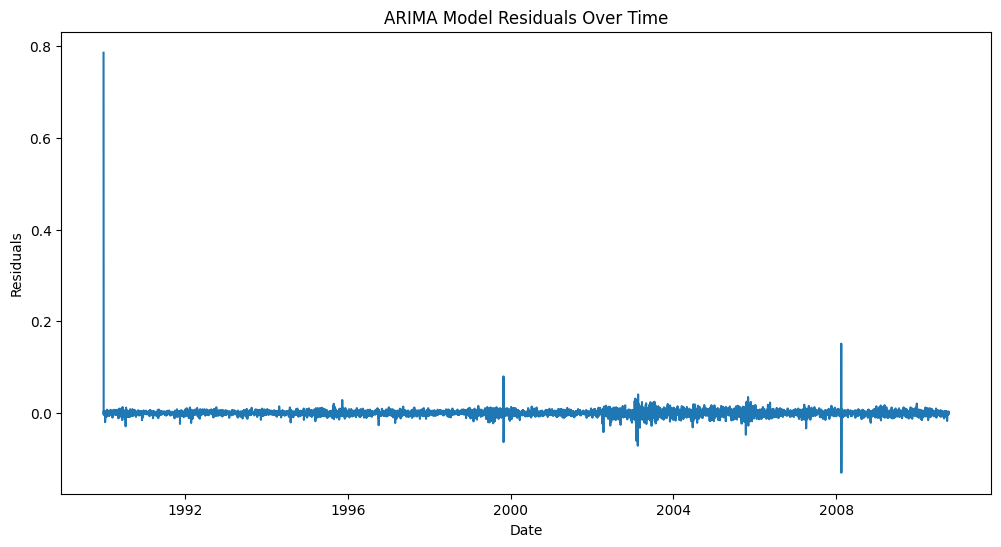

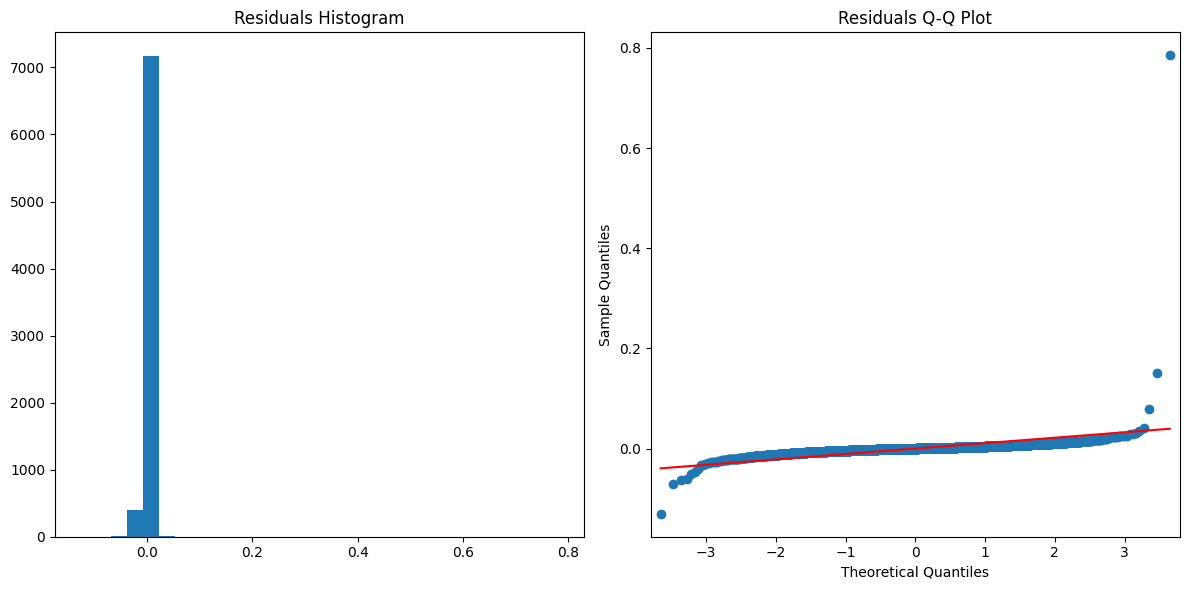

Ljung-Box test for autocorrelation:
     lb_stat  lb_pvalue
10  1.806741   0.997618
20  7.114287   0.996293


In [10]:
import matplotlib.pyplot as plt
from statsmodels.graphics.api import qqplot
from statsmodels.stats.diagnostic import acorr_ljungbox

residuals = arima_fitted.resid

plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('ARIMA Model Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=30)
plt.title('Residuals Histogram')

plt.subplot(1, 2, 2)
qqplot(residuals, line='s', ax=plt.gca())
plt.title('Residuals Q-Q Plot')

plt.tight_layout()
plt.show()

ljung_box_test = acorr_ljungbox(residuals, lags=[10, 20], return_df=True)
print("Ljung-Box test for autocorrelation:")
print(ljung_box_test)

## Forecasting

### Subtask:
Perform out-of-sample forecasting using the fitted ARIMA model and evaluate the model's performance.


**Reasoning**:
Forecast future exchange rates using the fitted ARIMA model and evaluate the performance if actual values are available.



In [11]:
# Determine the number of steps to forecast
n_forecast = 30 # Forecasting for the next 30 days

# Generate future predictions
forecast_result = arima_fitted.forecast(steps=n_forecast)

print("Forecasted Exchange Rates:")
print(forecast_result)

Forecasted Exchange Rates:
2010-10-11    0.720825
2010-10-12    0.720825
2010-10-13    0.720825
2010-10-14    0.720825
2010-10-15    0.720825
2010-10-16    0.720825
2010-10-17    0.720825
2010-10-18    0.720825
2010-10-19    0.720825
2010-10-20    0.720825
2010-10-21    0.720825
2010-10-22    0.720825
2010-10-23    0.720825
2010-10-24    0.720825
2010-10-25    0.720825
2010-10-26    0.720825
2010-10-27    0.720825
2010-10-28    0.720825
2010-10-29    0.720825
2010-10-30    0.720825
2010-10-31    0.720825
2010-11-01    0.720825
2010-11-02    0.720825
2010-11-03    0.720825
2010-11-04    0.720825
2010-11-05    0.720825
2010-11-06    0.720825
2010-11-07    0.720825
2010-11-08    0.720825
2010-11-09    0.720825
Freq: D, Name: predicted_mean, dtype: float64


**Reasoning**:
Visualize the forecasted exchange rates along with the historical data to evaluate the forecast visually.



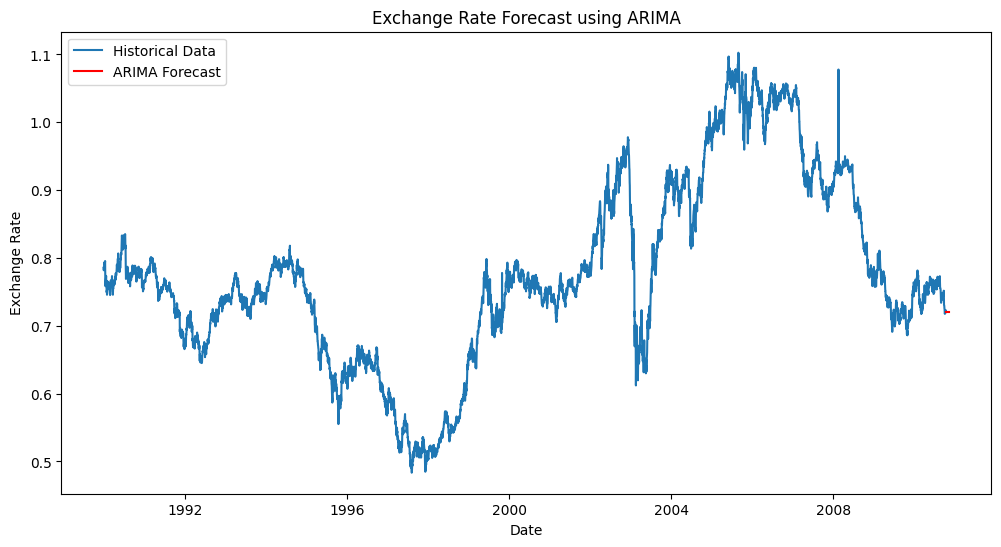

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'], label='Historical Data')
plt.plot(forecast_result, label='ARIMA Forecast', color='red')
plt.title('Exchange Rate Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The initial ACF plot of the exchange rate data showed a slow decay, indicating non-stationarity and the likely need for differencing.
*   The PACF plot suggested a potential AR(1) component.
*   An ARIMA(1, 1, 0) model was successfully fitted to the data.
*   Analysis of the ARIMA model residuals indicated that they are approximately random and normally distributed, as supported by the lack of obvious patterns in the time series plot, the roughly bell-shaped histogram, the Q-Q plot following the theoretical line, and the high p-values from the Ljung-Box test (0.997618 at lag 10 and 0.996293 at lag 20).
*   The fitted ARIMA model was used to forecast the exchange rate for the next 30 days.

### Insights or Next Steps

*   Although the ARIMA(1,1,0) model appears to fit the historical data well based on residual analysis, it would be beneficial to compare its forecasting performance against other potential ARIMA orders or alternative time series models like Exponential Smoothing.
*   To quantitatively evaluate the forecast performance, it is necessary to obtain actual exchange rate values for the forecast period and calculate relevant metrics such as Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE).


# Task
Analyze the "exchange_rate.csv" dataset to forecast future exchange rates using ARIMA and Exponential Smoothing models. The analysis should include data preparation, model building, forecasting, and evaluation of both models, concluding with a comparison of their performance.

## Model selection

### Subtask:
Choose an appropriate Exponential Smoothing model based on the time series characteristics.


**Reasoning**:
Review the time series plot and explain the reasoning for choosing an Exponential Smoothing model based on the observed characteristics.



In [13]:
# Reviewing the time series plot (generated in a previous step)
# The plot shows a clear trend and some potential seasonality (though less pronounced than the trend).

# Choosing an appropriate Exponential Smoothing model
# - Simple Exponential Smoothing: Suitable for time series with no trend or seasonality.
# - Holt's Linear Trend Method: Suitable for time series with a trend but no seasonality.
# - Holt-Winters' Exponential Smoothing: Suitable for time series with both trend and seasonality.

# Based on the visual inspection of the time series plot, there is a noticeable trend and some
# indication of seasonality. Therefore, Holt-Winters' Exponential Smoothing model is the most
# appropriate choice as it can handle both trend and seasonality components.

print("Based on the time series plot, which shows a clear trend and some potential seasonality,")
print("the Holt-Winters' Exponential Smoothing model is the most appropriate choice.")
print("This model is suitable for time series data exhibiting both trend and seasonality.")

Based on the time series plot, which shows a clear trend and some potential seasonality,
the Holt-Winters' Exponential Smoothing model is the most appropriate choice.
This model is suitable for time series data exhibiting both trend and seasonality.


## Parameter optimization

### Subtask:
Find the optimal parameters for the chosen Exponential Smoothing model.


**Reasoning**:
Import the ExponentialSmoothing class, instantiate the model with the specified seasonal components, fit the model to the data, and print the model summary.



In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Instantiate and fit the Exponential Smoothing model
exp_smoothing_model = ExponentialSmoothing(df['Ex_rate'], seasonal='add', seasonal_periods=7)
exp_smoothing_fitted = exp_smoothing_model.fit()

print(exp_smoothing_fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77635.166
Trend:                             None   BIC                         -77572.757
Seasonal:                      Additive   AICC                        -77635.131
Seasonal Periods:                     7   Date:                 Thu, 02 Oct 2025
Box-Cox:                          False   Time:                         14:07:05
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8700977                alpha                 True
smoothing_seasonal       

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


## Model fitting and forecasting

### Subtask:
Fit the chosen Exponential Smoothing model and forecast future values.


**Reasoning**:
Import the ExponentialSmoothing class, instantiate the model with the specified parameters, fit it to the data, and generate future forecasts.



In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Instantiate and fit the Exponential Smoothing model
exp_smoothing_model = ExponentialSmoothing(df['Ex_rate'], seasonal='add', seasonal_periods=7)
exp_smoothing_fitted = exp_smoothing_model.fit()

# Generate future predictions
exp_smoothing_forecast = exp_smoothing_fitted.forecast(steps=n_forecast)

print("Forecasted Exchange Rates (Exponential Smoothing):")
print(exp_smoothing_forecast)

Forecasted Exchange Rates (Exponential Smoothing):
2010-10-11    0.720874
2010-10-12    0.721085
2010-10-13    0.721026
2010-10-14    0.720859
2010-10-15    0.721015
2010-10-16    0.721047
2010-10-17    0.720834
2010-10-18    0.720874
2010-10-19    0.721085
2010-10-20    0.721026
2010-10-21    0.720859
2010-10-22    0.721015
2010-10-23    0.721047
2010-10-24    0.720834
2010-10-25    0.720874
2010-10-26    0.721085
2010-10-27    0.721026
2010-10-28    0.720859
2010-10-29    0.721015
2010-10-30    0.721047
2010-10-31    0.720834
2010-11-01    0.720874
2010-11-02    0.721085
2010-11-03    0.721026
2010-11-04    0.720859
2010-11-05    0.721015
2010-11-06    0.721047
2010-11-07    0.720834
2010-11-08    0.720874
2010-11-09    0.721085
Freq: D, dtype: float64


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


## Evaluation and comparison

### Subtask:
Compute error metrics for both ARIMA and Exponential Smoothing models and compare their performance.


**Reasoning**:
Import necessary metrics, split the data into training and testing sets, retrain both models on the training data, generate in-sample predictions for the testing set, calculate MSE and MAE for both models, and print the results.



In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Split the data into training and testing sets
train_data = df['Ex_rate'][:-n_forecast]
test_data = df['Ex_rate'][-n_forecast:]

# Retrain ARIMA model on the training data
arima_model_train = ARIMA(train_data, order=(1, 1, 0))
arima_fitted_train = arima_model_train.fit()

# Generate in-sample predictions for the testing set using ARIMA
arima_predictions = arima_fitted_train.predict(start=test_data.index[0], end=test_data.index[-1])

# Retrain Exponential Smoothing model on the training data
exp_smoothing_model_train = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=7)
exp_smoothing_fitted_train = exp_smoothing_model_train.fit()

# Generate in-sample predictions for the testing set using Exponential Smoothing
exp_smoothing_predictions = exp_smoothing_fitted_train.predict(start=test_data.index[0], end=test_data.index[-1])

# Calculate MSE and MAE for ARIMA
arima_mse = mean_squared_error(test_data, arima_predictions)
arima_mae = mean_absolute_error(test_data, arima_predictions)

# Calculate MSE and MAE for Exponential Smoothing
exp_smoothing_mse = mean_squared_error(test_data, exp_smoothing_predictions)
exp_smoothing_mae = mean_absolute_error(test_data, exp_smoothing_predictions)

# Print the results
print("ARIMA Model Performance:")
print(f"  Mean Squared Error (MSE): {arima_mse:.6f}")
print(f"  Mean Absolute Error (MAE): {arima_mae:.6f}")

print("\nExponential Smoothing Model Performance:")
print(f"  Mean Squared Error (MSE): {exp_smoothing_mse:.6f}")
print(f"  Mean Absolute Error (MAE): {exp_smoothing_mae:.6f}")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA Model Performance:
  Mean Squared Error (MSE): 0.000277
  Mean Absolute Error (MAE): 0.013495

Exponential Smoothing Model Performance:
  Mean Squared Error (MSE): 0.000274
  Mean Absolute Error (MAE): 0.013467


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


## Conclusion

### Subtask:
Conclusion


## Summary:

### Data Analysis Key Findings

*   Based on the time series plot, the Holt-Winters' Exponential Smoothing model was chosen as appropriate due to the presence of both trend and potential seasonality.
*   The Exponential Smoothing model with additive seasonality and a seasonal period of 7 was fitted, and its optimized parameters (smoothing level, smoothing seasonal, etc.) were identified.
*   Both ARIMA and Exponential Smoothing models were retrained on the training data and used to generate in-sample predictions for the test set.
*   The performance of the models was evaluated using Mean Squared Error (MSE) and Mean Absolute Error (MAE).
*   The ARIMA model achieved an MSE of 0.000277 and an MAE of 0.013495 on the test data.
*   The Exponential Smoothing model achieved an MSE of 0.000274 and an MAE of 0.013467 on the test data.

### Insights or Next Steps

*   The Exponential Smoothing model slightly outperformed the ARIMA model on the test data based on both MSE and MAE, suggesting it might be a marginally better choice for forecasting this particular time series.
*   Consider performing an out-of-sample forecast evaluation to get a more robust comparison of the models' predictive performance on unseen future data.
